In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
base_path = "q_learning_and_quotients"

In [3]:
base_data = [np.load(os.path.join(base_path, f"base{i}", "training_stats.npz")) for i in range(10)]
quotient_data = [np.load(os.path.join(base_path, f"quotient{i}", "training_stats.npz")) for i in range(10)]

In [4]:
def moving_average(x, window_size):
    """
    Compute the moving average of a 1D NumPy array.
    
    Args:
        x (np.ndarray): Input array.
        window_size (int): Size of the moving window.
    
    Returns:
        np.ndarray: Array of moving averages (length N - window_size + 1).
    """
    if window_size < 1:
        raise ValueError("window_size must be at least 1")
    if window_size > len(x):
        raise ValueError("window_size cannot be larger than input array length")
        
    cumsum = np.cumsum(np.insert(x, 0, 0))  # prefix sum
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [26]:
color_1 = "#BBBBBB"
color_2 = "#4477AA"

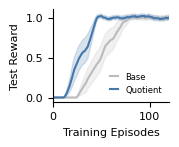

In [27]:
plt.figure(figsize=(1.5, 1.2))

b_mean = moving_average(np.mean([bd["test_episode_rewards"] for bd in base_data], axis=0), 10)
b_std = moving_average(np.std([bd["test_episode_rewards"] for bd in base_data], axis=0), 10)
plt.plot(b_mean, label="Base", color=color_1)
plt.fill_between(range(len(b_mean)), b_mean - b_std / np.sqrt(10), b_mean + b_std / np.sqrt(10), alpha=0.2, color=color_1)

q_mean = moving_average(np.mean([qd["test_episode_rewards"] for qd in quotient_data], axis=0), 10)
q_std = moving_average(np.std([qd["test_episode_rewards"] for qd in quotient_data], axis=0), 10)
plt.plot(q_mean, label="Quotient", color=color_2)
plt.fill_between(range(len(q_mean)), q_mean - q_std / np.sqrt(10), q_mean + q_std / np.sqrt(10), alpha=0.2, color=color_2)
plt.legend(frameon=False, fontsize=6, handlelength=1)
plt.xlim((0, 120))

plt.xlabel("Training Episodes", fontsize=8)
plt.ylabel("Test Reward", fontsize=8)

# Adjust tick label size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

sns.despine()

plt.savefig("fig_base_vs_quotient_mdp.pdf", dpi=300, bbox_inches='tight', pad_inches=0)

(0.0, 120.0)

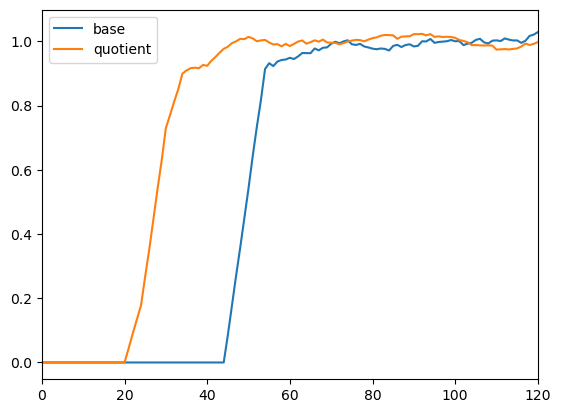

In [58]:
b_mean = moving_average(np.median([bd["test_episode_rewards"] for bd in base_data], axis=0), 10)
b_std = moving_average(np.std([bd["test_episode_rewards"] for bd in base_data], axis=0), 5)
plt.plot(b_mean, label="base")
# plt.fill_between(range(len(b_mean)), b_mean - b_std, b_mean + b_std, alpha=0.2)

q_mean = moving_average(np.median([qd["test_episode_rewards"] for qd in quotient_data], axis=0), 10)
q_std = moving_average(np.std([qd["test_episode_rewards"] for qd in quotient_data], axis=0), 5)
plt.plot(q_mean, label="quotient")
# plt.fill_between(range(len(q_mean)), q_mean - q_std, q_mean + q_std, alpha=0.2)
plt.legend()
plt.xlim((0, 120))

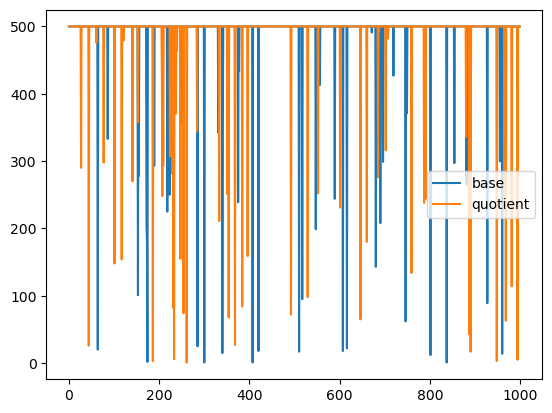

In [19]:
plt.plot(data["episode_lengths"], label="base")
plt.plot(quotient_data["episode_lengths"], label="quotient")
plt.legend()

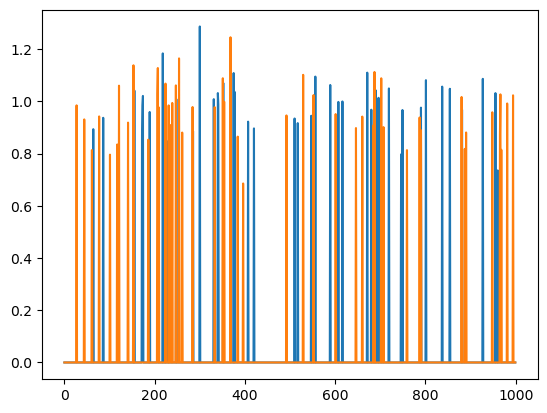

In [20]:
plt.plot(data["episode_rewards"], label="base")
plt.plot(quotient_data["episode_rewards"], label="quotient")